# Modelo para previsão de jogos com base em apostas
Utilizando de dados de Odds e uma base de dados que contém os jogos do campeonato brasileiro, será montado modelo para previsão de resultados

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from seaborn import heatmap
from sklearn.model_selection import cross_val_score

In [2]:
# Ler e printar DataFrame
Dados = pd.read_csv("https://www.football-data.co.uk/new/BRA.csv")
Dados.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [3]:
# Dropar valores nulos
Dados.dropna(inplace=True)

# Checar valores nulos
Dados.isna().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PH         0
PD         0
PA         0
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

array([[<AxesSubplot:title={'center':'Season'}>,
        <AxesSubplot:title={'center':'HG'}>,
        <AxesSubplot:title={'center':'AG'}>],
       [<AxesSubplot:title={'center':'PH'}>,
        <AxesSubplot:title={'center':'PD'}>,
        <AxesSubplot:title={'center':'PA'}>],
       [<AxesSubplot:title={'center':'MaxH'}>,
        <AxesSubplot:title={'center':'MaxD'}>,
        <AxesSubplot:title={'center':'MaxA'}>],
       [<AxesSubplot:title={'center':'AvgH'}>,
        <AxesSubplot:title={'center':'AvgD'}>,
        <AxesSubplot:title={'center':'AvgA'}>]], dtype=object)

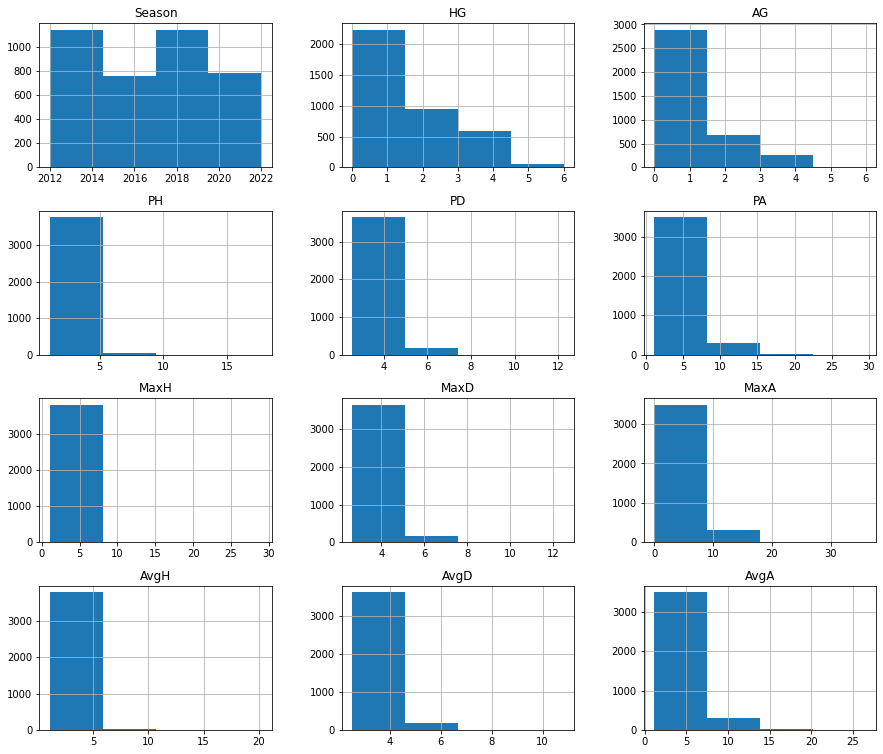

In [4]:
# Checar distribuição dos valores
Dados.hist(figsize=(15,13), bins=4)

In [5]:
# Retirar colunas que não possuem informações relevantes
Dados.drop(["Country", "League", "Time", "Date", "HG", "AG"],axis="columns", inplace=True)
Dados.head()

,Season,Home,Away,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,2012,Palmeiras,Portuguesa,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2012,Sport Recife,Flamengo RJ,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2012,Figueirense,Nautico,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,2012,Botafogo RJ,Sao Paulo,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,2012,Corinthians,Fluminense,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [6]:
# Pegar dados pra uma temporada só
temporada = 2020
Campeonato = Dados.loc[Dados["Season"] == temporada,:].drop("Season", axis="columns")
Campeonato

,Home,Away,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
3040,Fortaleza,Athletico-PR,A,2.04,3.38,3.85,2.09,3.48,4.20,2.02,3.25,3.77
3041,Coritiba,Internacional,A,3.85,3.13,2.14,4.15,3.25,2.26,3.77,3.06,2.11
3042,Sport Recife,Ceara,H,2.94,3.02,2.67,3.13,3.17,2.77,2.91,2.93,2.61
3043,Flamengo RJ,Atletico-MG,A,1.46,4.84,6.35,1.52,4.85,7.40,1.47,4.46,6.27
3044,Santos,Bragantino,D,2.17,3.31,3.53,2.23,3.98,3.60,2.15,3.25,3.39
...,...,...,...,...,...,...,...,...,...,...,...,...
3415,Ceara,Botafogo RJ,H,1.88,3.91,4.06,1.90,4.20,4.90,1.81,3.81,4.02
3416,Fluminense,Fortaleza,H,1.75,3.59,5.33,1.79,3.64,5.50,1.74,3.38,5.09
3417,Internacional,Corinthians,D,1.47,4.36,7.74,1.50,4.75,7.81,1.45,4.19,7.20
3418,Sao Paulo,Flamengo RJ,H,4.91,4.35,1.66,5.25,4.40,2.00,4.71,4.02,1.67


In [7]:
# Transformar as variáveis categóricas para valores numéricos
Campeonato.loc[:,"Res"] = LabelEncoder().fit_transform(Campeonato.loc[:,"Res"])
Campeonato.loc[:,"Home"] = LabelEncoder().fit_transform(Campeonato.loc[:,"Home"])
Campeonato.loc[:,"Away"] = LabelEncoder().fit_transform(Campeonato.loc[:,"Away"])
Campeonato

,Home,Away,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
3040,11,0,0,2.04,3.38,3.85,2.09,3.48,4.20,2.02,3.25,3.77
3041,8,14,0,3.85,3.13,2.14,4.15,3.25,2.26,3.77,3.06,2.11
3042,18,6,2,2.94,3.02,2.67,3.13,3.17,2.77,2.91,2.93,2.61
3043,9,2,0,1.46,4.84,6.35,1.52,4.85,7.40,1.47,4.46,6.27
3044,16,5,1,2.17,3.31,3.53,2.23,3.98,3.60,2.15,3.25,3.39
...,...,...,...,...,...,...,...,...,...,...,...,...
3415,6,4,2,1.88,3.91,4.06,1.90,4.20,4.90,1.81,3.81,4.02
3416,10,11,2,1.75,3.59,5.33,1.79,3.64,5.50,1.74,3.38,5.09
3417,14,7,1,1.47,4.36,7.74,1.50,4.75,7.81,1.45,4.19,7.20
3418,17,9,2,4.91,4.35,1.66,5.25,4.40,2.00,4.71,4.02,1.67


In [8]:
# Checar mapa de calor das correlações entre variáveis
Campeonato.corr()

,Home,Away,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
Home,1.000000,-0.052632,0.029845,0.021158,-0.030379,0.005894,0.021583,-0.029114,0.004711,0.021491,-0.038427,0.007023
Away,-0.052632,1.000000,-0.017686,0.038271,0.042631,0.065544,0.038639,0.058399,0.076191,0.038039,0.048009,0.068788
Res,0.029845,-0.017686,1.000000,-0.257740,0.143114,0.262391,-0.261016,0.163960,0.247978,-0.261713,0.155447,0.261082
PH,0.021158,0.038271,-0.257740,1.000000,-0.124578,-0.692160,0.997049,-0.149336,-0.661262,0.998728,-0.133684,-0.695600
PD,-0.030379,0.042631,0.143114,-0.124578,1.000000,0.748292,-0.112475,0.986720,0.756843,-0.136486,0.994851,0.744274
PA,0.005894,0.065544,0.262391,-0.692160,0.748292,1.000000,-0.682523,0.771318,0.985151,-0.700850,0.757187,0.995194
MaxH,0.021583,0.038639,-0.261016,0.997049,-0.112475,-0.682523,1.000000,-0.136894,-0.651774,0.998086,-0.121599,-0.686223
MaxD,-0.029114,0.058399,0.163960,-0.149336,0.986720,0.771318,-0.136894,1.000000,0.785896,-0.160985,0.993388,0.769629
MaxA,0.004711,0.076191,0.247978,-0.661262,0.756843,0.985151,-0.651774,0.785896,1.000000,-0.670515,0.771566,0.993808
AvgH,0.021491,0.038039,-0.261713,0.998728,-0.136486,-0.700850,0.998086,-0.160985,-0.670515,1.000000,-0.145898,-0.704836


In [9]:
# Criar features e labels
X = Campeonato.drop(["Res"], axis="columns")
y = Campeonato.loc[:,"Res"]

# Separar em treino e teste
X_treino, X_Teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Criar Modelo
Modelo = RandomForestClassifier()
Modelo.fit(X_treino, y_treino)

# Testar Acurácia
Modelo.score(X_Teste, y_teste)

0.47368421052631576

In [11]:
# Validação cruzada
cross_val_score(RandomForestClassifier(), X, y)

array([0.34210526, 0.36842105, 0.32894737, 0.42105263, 0.36842105])

In [54]:
# Previsão de jogos de um campeonato específico como forma de função
def Prever_Campeonato(Ano=None):
    # Puxar Dados
    Dados = pd.read_csv("https://www.football-data.co.uk/new/BRA.csv")
    
    # Retirar Dados faltantes
    Dados.dropna(inplace=True)

    # Retirar colunas presumidas como irrelevantes
    Dados.drop(["Country", "League", "Time", "Date"],axis="columns", inplace=True)

    # Manter somente a season desejada, se tal argumento for passado
    if Ano != None:
        Campeonato = Dados.loc[Dados["Season"] == Ano,:].drop("Season", axis="columns")
    else:
        Campeonato = Dados.drop("Season", axis="columns")
    
    # Transformar variáveis em categóricas
    Campeonato.loc[:,"Res"] = LabelEncoder().fit_transform(Campeonato.loc[:,"Res"])
    Campeonato.loc[:,"Home"] = LabelEncoder().fit_transform(Campeonato.loc[:,"Home"])
    Campeonato.loc[:,"Away"] = LabelEncoder().fit_transform(Campeonato.loc[:,"Away"])
    
    # Criar features e labels
    X = Campeonato.drop(["Res"], axis="columns")
    y = Campeonato.loc[:,"Res"]
    
    # Separar em treino e teste
    X_treino, X_Teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Criar Modelo
    Modelo = RandomForestClassifier()
    Modelo.fit(X_treino, y_treino)
    
    # Testar Acurácia
    print(f"Acurácia: {Modelo.score(X_Teste, y_teste)}")

    # Retornar Modelo
    # return Modelo

In [56]:
Prever_Campeonato()

Acurácia: 0.9869109947643979


RandomForestClassifier()